In [ ]:
from google.colab import drive

# mounting dataset from gdrive
drive.mount('/content/gdrive', force_remount=True)

# dataset path
root_path = 'gdrive/My Drive/Colab Notebooks/TA/'

print("Path root:", root_path)

Mounted at /content/gdrive
Path root: gdrive/My Drive/Colab Notebooks/TA/


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def read_image(image_path):
    raw_img = cv2.imread(image_path)
    if raw_img.shape[2] == 3:
        raw_img = cv2.cvtColor(raw_img, cv2.COLOR_BGR2RGB)
    return raw_img

def show_image(rgb_img):
    plt.figure(figsize=(10,20))
    plt.imshow(rgb_img)
    plt.axis('off')

Image dimension: (105, 173)


(-0.5, 172.5, 104.5, -0.5)

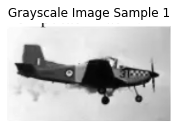

In [ ]:
# read image
raw_img1 = read_image(root_path + 'pesawat1.png')


# convert to grayscale
gray_img1 = cv2.cvtColor(raw_img1, cv2.COLOR_RGB2GRAY)

print('Image dimension:', gray_img1.shape)

# show image sample
ax1 = plt.figure(figsize=(10,8))
plt.subplot(1,3,1)
plt.imshow(gray_img1, cmap='gray')
plt.title('Grayscale Image Sample 1')
plt.axis('off')

(-0.5, 172.5, 104.5, -0.5)

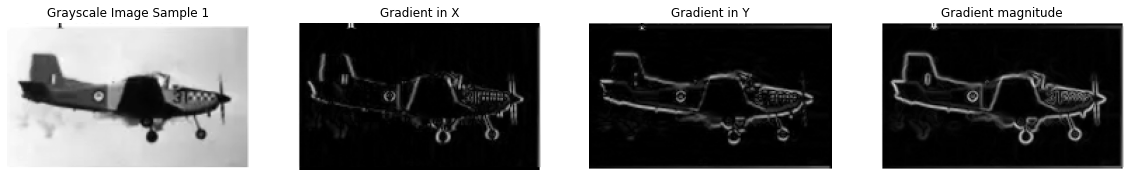

In [ ]:
# extract image gradient,
# Gx = img(x+1,y) - img(x-1,y) <== gradient in X-direction
# Gy = img(x,y+1) - img(x,y-1) <== gradient in Y-direction
# G = sqrt(Gx^2 + Gy^2) <== gradient magnitude
# theta = arctan(Gy/Gx)*(180/PI) <== gradient orientation in degree
# padding the image to process the border
nrows, ncols = gray_img1.shape
pad_img = np.zeros((nrows+2,ncols+2), dtype=float)
pad_img[1:nrows+1,1:ncols+1] = gray_img1.astype(float).copy()

# image gradient in X-direction
xdir_img = np.zeros(gray_img1.shape)
# image gradient in Y-direction
ydir_img = np.zeros(gray_img1.shape)
# image gradient magnitude
mag_img = np.zeros(gray_img1.shape)

# you can use matrix directly to compute the gradient
xdir_img = pad_img[1:nrows+1,2:ncols+2] - pad_img[1:nrows+1,0:ncols]
ydir_img = pad_img[2:nrows+2,1:ncols+1] - pad_img[0:nrows,1:ncols+1]
mag_img = np.sqrt(np.square(xdir_img) + np.square(ydir_img))

# show images
plt.figure(figsize=(20,10))
plt.subplot(1,4,1)
plt.imshow(gray_img1, cmap='gray')
plt.title('Grayscale Image Sample 1')
plt.axis('off')

plt.subplot(1,4,2)
plt.imshow(cv2.convertScaleAbs(xdir_img), cmap='gray')
plt.title('Gradient in X')
plt.axis('off')

plt.subplot(1,4,3)
plt.imshow(cv2.convertScaleAbs(ydir_img), cmap='gray')
plt.title('Gradient in Y')
plt.axis('off')

plt.subplot(1,4,4)
plt.imshow(cv2.convertScaleAbs(mag_img), cmap='gray')
plt.title('Gradient magnitude')
plt.axis('off')

(-0.5, 172.5, 104.5, -0.5)

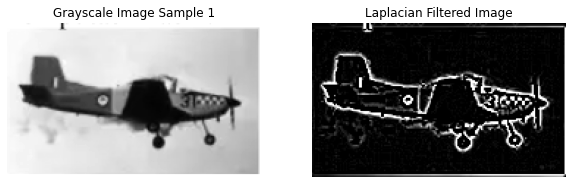

In [ ]:
# example of 5x5 Laplacian kernel
lap_kernel = np.array([[ 0, 0,-1, 0, 0],
                       [ 0,-1,-2,-1, 0],
                       [-1,-2,16,-2,-1],
                       [ 0,-1,-2,-1, 0],
                       [ 0, 0,-1, 0, 0]])
lap_img = cv2.filter2D(gray_img1, -1, lap_kernel)
# show images
ax1 = plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
plt.imshow(gray_img1, cmap='gray')
plt.title('Grayscale Image Sample 1')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(cv2.convertScaleAbs(lap_img), cmap='gray')
plt.title('Laplacian Filtered Image')
plt.axis('off')

(-0.5, 172.5, 104.5, -0.5)

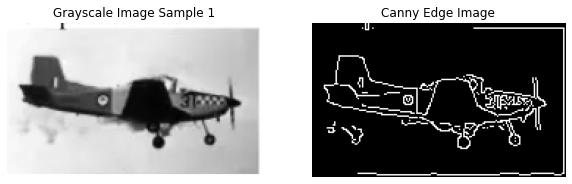

In [ ]:
# Canny edge detection using OpenCV
# params = img, threshold1, threshold2
# you can adjust the threshold to remove noise
edge_img1 = cv2.Canny(gray_img1, 80, 100)

# show images
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.imshow(gray_img1, cmap='gray')
plt.title('Grayscale Image Sample 1')
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(edge_img1, cmap='gray')
plt.title('Canny Edge Image')
plt.axis('off')